<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/3_1_Anna's_Music_Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anna's Music Box
*Rule-based* systems can be cumbersome to write and reason through, often involving complex, branching logical control flow  *if/then* structures and large sets of rules. In a **parametric** model, by comparison, musical features — such as rhythm, melody, harmony, or even "interestingness" — are expressed with numerical values, often between 0 and 1, called *parameters*. In this notebook, we'll reverse engineer Larry Polansky's *Anna's Music Box* and code a few musical parameters to represent features of melody and rhythm. 


## Setup

In [0]:
# install external libraries
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [0]:
# imports
import mai
import random

## (1) Rhythm: Pulse
How would you express the concept of *rhythm* as a value between `0.0` and `1.0`? In AMB, two parameters `pulse` and `rhythm` together determine the timing of notes. Let's see if we can reverse engineer how they work.



 Music often has a recurring *beat* — it's what you clap your hands to or tap your foot along with. *Pulse* is the speed, or duration, of that beat, and it is generally measured in "beats per minute" (*bpm*). In AMB, the parameter `pulse` determines the basic note duration in bpm.

**Exercise:** Let's write an expression to compute the  note duration (in seconds) given a value of `pulse` (in bpm). This is done by dividing the number of seconds in a minute, `60`, by number of beats per minute, `pulse`.

In [0]:
# parameters
pulse = 240

# duration in seconds
60 / pulse

0.25

Now let's generate a sequence of notes with with duration determined by `pulse`. What does it sound like? We have an even sequence of note durations, or a steady pulse. Try changing the `pulse` value.

In [0]:
# start with an empty list
my_durs = []

# loop until we have enough notes
while len(my_durs) < 16:

  # choose duration
  new_dur = 60 / pulse
  
  # append to the melody
  my_durs += [new_dur]

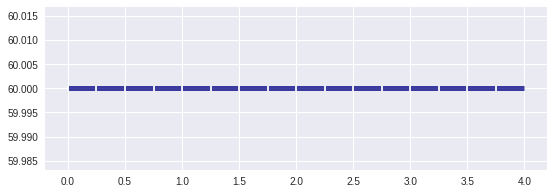

In [0]:
# let's see it
mai.make_music_plot(pitches=60, durs=my_durs)

# let's hear it
mai.make_music(pitches=60, durs=my_durs, is_drum=True)

## (1) Rhythm: Variation
But in many forms of music, notes are not all the same duration. In AMB, this variation in duration is what Polansky means by rhythm, and is quantified as *amount of deviation from the pulse*. Let's modify the previous cell to add a random deviation to this steady pulse. We'll need a new random number generator, `random.uniform()`, which gives a random *floating point* number.

**Exercise:** Given values for `pulse` and `rhythm`, let's write an expression to generate note durations that randomly deviate from the `pulse` duration according to the value of `rhythm`. 

In [0]:
# parameters
pulse = 240
rhythm = 1

# duration in seconds
duration = 60.0 / pulse

# random variation in duration
duration * random.uniform(1 - rhythm, 1 + rhythm)

0.04090916824629198

Note that we use `(1 - rhythm, 1 + rhythm)` to generate a random number within a given range, both above and below, of the vaue `1`. We then multiply by the pulse `duration` because we want the variation to be proportional to the pulse.

Now let's generate a sequence of notes with with duration determined by both `pulse` and `rhythm`. What does it sound like? Try changing the parameter values.

In [0]:
# start with an empty list
my_durs = []

# loop until we have enough notes
while len(my_durs) < 12:

  # choose duration
  new_dur = (60.0 / pulse) * random.uniform(1 - rhythm, 1 + rhythm)

  # append to the melody
  my_durs += [new_dur]

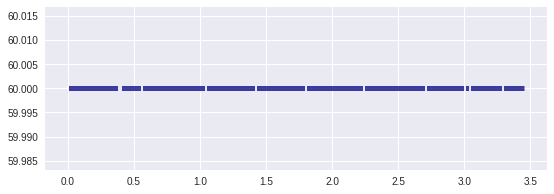

In [0]:
# let's see it
mai.make_music_plot(pitches=60, durs=my_durs)

# let's hear it
mai.make_music(pitches=60, durs=my_durs, is_drum=True)

A `rhythm` value of `0` produces a steady pulse, and a `rhythm` value of `1` produces uneven rhythms. This gives us an entire *continuum* of rhythms, spanning everything in between!

## (2) Pitch
How about pitch? How would you express *pitch* as a value between `0` and `1`? In AMB, the two parameters `pitch` and `range` together determine the possible pitches, expressed in terms of a center pitch and range above and below that center pitch.

**Exercise:** Given values for `pitch_center` and `pitch_range`, let's write an expression to choose a random pitch. Remember, the two values inside the parenthesis determined the mininum and maximum value of `random.randint(0,127)`.

In [0]:
# parameters
pitch_center = 60
pitch_range = 6 

# choose pitch
random.randint(pitch_center - pitch_range, pitch_center + pitch_range)

62

Note that we again use the construction `(pitch_center - pitch_range, pitch_center + pitch_range)` to generate a value within a given range of a center value.

Let's try it. Add pitch the previous `while` loop --- now we're choosing pitch as well as duration. Our list of parameters is growing...

In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 24:

  # choose pitch
  new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)
  
  # choose duration
  new_dur = (60.0 / pulse) * random.uniform(1 - rhythm, 1 + rhythm)
  
  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_dur]

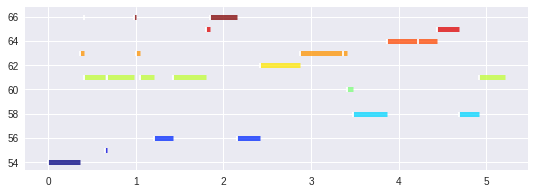

In [0]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)

# let's hear it
mai.make_music(pitches=my_pitches, durs=my_durs, is_drum=False)

## (3) De-tuning
I thought it'd be fun to add a parameter called `detune` to control microtonal pitch inflections, since I like them so much.

**Exercise:** Given a value for `detune` , let's write an expression to adjust the chosen pitch up to plus/minus one semitone (`+/-1.0`).

In [0]:
# parameter
detune = 1.0

# given a pitch
pitch = 60

# microtronal pitch adjustment
random.uniform(pitch - detune, pitch + detune)

60.733581739169

And add it to the `while` loop.

In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 24:

  # choose pitch
  new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)
  
  # microtonal pitch adjustment 
  new_pitch = random.uniform(new_pitch - detune, new_pitch + detune)
  
  # choose duration
  new_dur = (60.0 / pulse) * random.uniform(1 - rhythm, 1 + rhythm)

  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_dur]

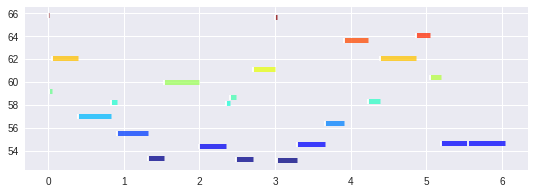

In [0]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)

# let's hear it
mai.make_music(pitches=my_pitches, durs=my_durs, is_drum=False)

## (4) Repeat
AMB has a parameter called `repeat` which controls the "interesting-ness" of the melody. I think this is pretty cool, because we're no longer quantifying lower level musical features like which notes and which durations, but thinking about higher level music concepts, like what even makes something interesting? In this case, "interestingness" has to do with how much the melody repeats itself.

In AMB, `repeat` controls the likelihood that the critter looks back and repeats a recent note. Believe it or not, there's more than one way to do this... Let's say that if the critter decides to look back 8 notes it takes and repeats the value of the eighth previous note.

**Exercise:** Given a value for `repeat`, we'll use an `if` statement to control the likelihood that the melody repeats itself. Use `random.random()` which generates a random floating point number between `0` and `1`.


In [0]:
# parameter
repeat = 0.7

# let's say this is our music thus far
my_music = [60, 62, 64, 64, 64, 66, 64, 60]

# do we look back or choose a brand new pitch?
if random.random() <= repeat:

  # take the fifth previous note
  pitch = my_music[-8]

print(pitch)

60


Note that we want to use a *less than or equal to* sign `<=` (not a greater than or equal to sign)!

And add it to the `while` loop.

In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 16:

  # do we look back?
  if random.random() <= repeat and len(my_pitches) >= 8:
    
    # use the fifth previous note
    new_pitch = my_pitches[-8]
    new_dur = my_durs[-8]
 
  # if we don't look back
  else:
    
    # choose pitch
    new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)

    # microtonal pitch adjustment 
    new_pitch = random.uniform(new_pitch - detune, new_pitch + detune)

    # choose duration
    new_dur = (60.0 / pulse) * random.uniform(1 - rhythm, 1 + rhythm)

  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_dur]

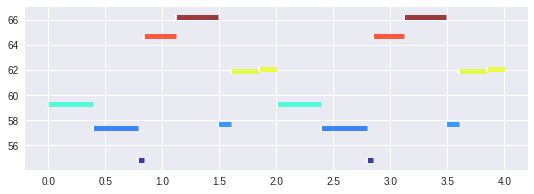

In [0]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)

# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=1)

## Many many parameters
At this point we've accumulated quite a few musical parameters — for rhythm, pitch, tuning, and interestingness. The neat thing about parametric models is all of the different combinations of parameter values describe different musical systems. Let's put them all together in one place. Try adjusting a few parameters below and see what comes out.

In [0]:
# parameters
pitch_center = 60 # center pitch 
pitch_range = 6   # variation in pitch
pulse = 240       # in bpm beats per minute
rhythm = 1        # percent of variation around the pulse
detune = 0.5      # amount of microtonal inflection
repeat = 0.85     # probability of repeat or interestingness

## Functions
At this point I'm pretty tired of copy and pasting that giant `while` loop, so what can we do about it? The answer: **functions**. Functions allow us to reuse code. We'll put the code that we want to reuse — e.g., that huge `while` loop — inside a function defintion. Then, when we call the function name, Python will exectue the code inside. This allows us to reuse the same code without having to rewrite it every time.



The function `amb` is already defined for us in the class code package, just write `mai.amb()` and you can run AMB in just one line of code! Functions are central concept in programming and we'll learn more about them in the next Tutorial. But first, a few key concepts.

1. Funtions have *arguments* — the values written between the parenthesis `()` — and we'll use them to set the values of the AMB parameters.

2. Functions can return values. In our case, `amb` will return two lists, one for pitches and one for durations.

In [0]:
# run AMB
my_pitches, my_durs = mai.amb(pitch_center=60, 
                              pitch_range=12, 
                              pulse=240, 
                              rhythm=0.3, 
                              detune=0.3, 
                              repeat=0.7, 
                              memory=5, 
                              length=40)

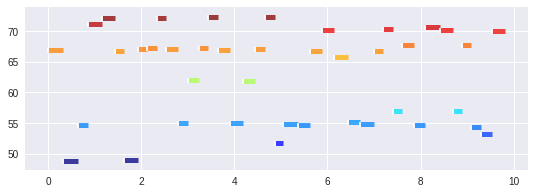

In [0]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)

# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=1, is_drum=False)

## How many jelly beans are in the jar?
These might seem like an odd question, but how many *different* musics can you find by turning those parameter values? Let's use a random search to help answer the question. Choose some random parameter settings and see what we get.

RANDOM PARAMETERS!
- pitch center: 62
- pitch range: 13
- pulse: 148
- rhythm: 0.019581088737275376
- detune: 0.6259893271290293
- repeat: 0.8847835388942795
- memory: 10


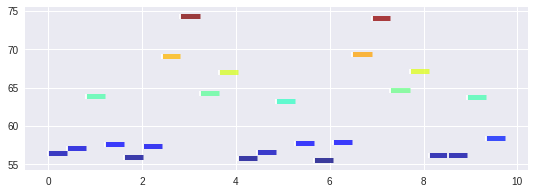

In [0]:
# choose parameters
pitch_center = random.randint(24, 99) # pitch in MIDI pitch value 
pitch_range = random.randint(1, 36)   # variation in MIDI pitch value
pulse = random.randint(40, 480)       # in bpm beats per minute
rhythm = random.uniform(0, 1)         # percent of variation around the pulse
detune = random.uniform(0, 1)         # amount of microtonal inflection
repeat = random.uniform(0, 1)         # probability of repeat
memory = random.randint(0, 10)        # how far back to look
pgm = random.randint(0, 127)          # instrument sound

# print random parameters
print("RANDOM PARAMETERS!")
print("- pitch center:", pitch_center)
print("- pitch range:", pitch_range)
print("- pulse:", pulse)
print("- rhythm:", rhythm)
print("- detune:", detune)
print("- repeat:", repeat)
print("- memory:", memory)

# run AMB
my_pitches, my_durs = mai.amb(pitch_center=pitch_center, pitch_range=pitch_range, pulse=pulse, rhythm=rhythm, detune=detune, repeat=repeat, memory=memory)

# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)

# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=pgm+1, is_drum=False)

## Numerically vs Perceptually different
Yes, there are a whole lot of parameter combinations that are *numerically* different, but that doesn't mean they are *perceptually* different — that is, it doesn't means they'll actually *sound* all that different to us. This is a super important point when dealing with parametrics systems. Not every change makes a difference. We can imagine a space of all possible combinations of parameter values, but (possibly) large regions of this space are perceptually the same!


## a GUI
Think you can do better than random search by turning those knobs yourself? To make things easier, I've conveniently tucked the code away under a graphical user interface (GUI). We can forget about all the code and just worry about selecting parameters and *listening*. Adjust AMB parameters using sliders and hit run to generate music.

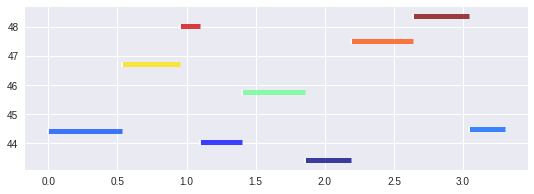

In [0]:
#@title Anna's Music Box

# choose parameters
length = 9 #@param {type:"slider", min:1, max:99, step:1.0}
pitch_center = 45 #@param {type:"slider", min:32, max:84, step:1.0}
pitch_range = 3 #@param {type:"slider", min:0, max:36, step:1.0}
pulse = 184 #@param {type:"slider", min:40, max:480, step:1.0}
rhythm = 0.73 #@param {type:"slider", min:0, max:1, step:0.01}
detune = 1 #@param {type:"slider", min:0, max:1, step:0.01}
repeat = 0.82 #@param {type:"slider", min:0, max:1, step:0.01}
memory = 5 #@param {type:"slider", min:1, max:10, step:1.0}
pgm = 22 #@param {type:"slider", min:1, max:128, step:1.0}
is_drums = True #@param {type:"boolean"}
autoplay = False #@param {type:"boolean"}

# run AMB
my_pitches, my_durs = mai.amb(pitch_center=pitch_center, pitch_range=pitch_range, pulse=pulse, rhythm=rhythm, detune=detune, repeat=repeat, memory=memory, length=length)

# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)

# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=pgm, is_drum=is_drums, format='autoplay' if autoplay else 'inbrowser')

## Multiple Voices? Heterophony
AMB has four voices, or critters. The critters, however, are realtively independent. It's not as though one is the main voice and the other are accompaniment. This kind of a musical structure is called *heterophony*. Here's a version of AMB with multiple voices, or critters.

In [0]:
#@title Anna's Music Box

# choose parameters
length = 18 #@param {type:"slider", min:1, max:99, step:1.0}
pitch_center = 52 #@param {type:"slider", min:32, max:84, step:1.0}
pitch_range = 36 #@param {type:"slider", min:0, max:36, step:1.0}
pulse = 201 #@param {type:"slider", min:40, max:480, step:1.0}
rhythm = 0.57 #@param {type:"slider", min:0, max:1, step:0.01}
detune = 0.24 #@param {type:"slider", min:0, max:1, step:0.01}
repeat = 1 #@param {type:"slider", min:0, max:1, step:0.01}
memory = 5 #@param {type:"slider", min:1, max:10, step:1.0}
pgm = 13 #@param {type:"slider", min:1, max:128, step:1.0}
num_critters = 4 #@param {type:"slider", min:1, max:16, step:1.0}
is_drums = False #@param {type:"boolean"}
autoplay = False #@param {type:"boolean"}

# run AMB
my_music = [mai.amb(pitch_center=pitch_center, 
                    pitch_range=pitch_range, 
                    pulse=pulse, rhythm=rhythm, 
                    detune=detune, 
                    repeat=repeat, 
                    memory=memory, 
                    length=length) 
            for i in range(num_critters)]

# combine multiple voices
pitches = [x[0] for x in my_music]
durs = [x[1] for x in my_music]

# let's hear it
mai.make_music_heterophonic(pitches, durs=durs, pgm=pgm, is_drum=is_drums, format='autoplay' if autoplay else 'inbrowser')